In [1]:
from cellcalc import get_primitive_hkl, get_pri_vec_inplane, get_normal_index
from interface_generator import core, print_near_axis, convert_vector_index
from numpy import array, dot, round, cross
from numpy.linalg import inv, det

In [2]:
my_interface = core('Al2O3_mp-1143_conventional_standard.cif',\
                    'ZnO_mp-2133_conventional_standard.cif')

Warning!, this programme will rewrite the POSCAR file in this dir!


/Users/jasonxie/.local/lib/python3.8/site-packages/pymatgen/io/cif.py:1121: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


# Get the two axis aligned to be collinear, expressed in primitive cell

Here, we want the (1,-1,0,2) plane of the Al2O3 coincident whith (1,1,-2,0) plane of ZnO.

Firstly, the programme rotate lattice 2 so that the two lattice plane overlap.

As the normal of the plane have different indices with the miller indices, we need to compute it.

In [3]:
normal_1 = get_normal_index([1, -1, 2], my_interface.conv_lattice_1)
axis_1 = convert_vector_index(my_interface.conv_lattice_1, \
                              my_interface.lattice_1, normal_1)

In [4]:
normal_2 = get_normal_index([1, 1, 0], my_interface.conv_lattice_2)
axis_2 = convert_vector_index(my_interface.conv_lattice_2, \
                              my_interface.lattice_2, normal_2)

rotation lattice 2 so that the [1,0,0] axis is along [-1, -1, -1] axis of lattice 1

In [5]:
my_interface.set_orientation_axis(axis_1,axis_2)

# Searching two_dimensional CSL

In [6]:
my_interface.parse_limit(du = 1e-1, S  = 1e-1, sgm1=100, sgm2=100, dd = 1e-1)

#Do searching!
#We already know that there is a CSL by rotation 180 degrees
my_interface.search_one_position(axis_1,0,180,0.01,two_D = True)

[-27.29017677  15.75599091 -19.99504779]
Congrates, we found an appx CSL!

U1 = 
[[ 0  0 -5]
 [-1  0  0]
 [ 0  1  0]]; sigma_1 = 5

U2 = 
[[1 0 0]
 [0 0 4]
 [0 1 0]]; sigma_2 = 5

D = 
[[ 1.0407317  -0.02351646  0.        ]
 [-0.02351646  1.01357723 -0.        ]
 [ 0.         -0.          0.97571696]]

axis = [-27.29017677  15.75599091 -19.99504779] ; theta = 0.0



# Get bicrystal

In [7]:
my_interface.compute_bicrystal_two_D(orthogonal = False, lim = 50, tol = 1e-2)

In [9]:
my_interface.get_bicrystal(two_D = True, xyz_1 = [2,1,1], xyz_2 = [4,1,1])

Please check the POSCAR file

# Different terminating planes

There exist some choices of terminating planes of both slabs,
we can directly see these planes here

In [9]:
#lattice plane spacing of the two slabs
my_interface.d1, my_interface.d2

(3.5136362263385323, 1.6445512400000002)

In [10]:
my_interface.dp_list_1, my_interface.dp_list_2

([0.6810449053541383,
  1.0393449053541381,
  1.7567449053541377,
  2.474244905354139,
  2.832444905354139],
 [1.2891])

Lattice 1 has 5 terminating planes while lattice 2 has only one

saving high resolution figure will take some time...please wait for a while :D


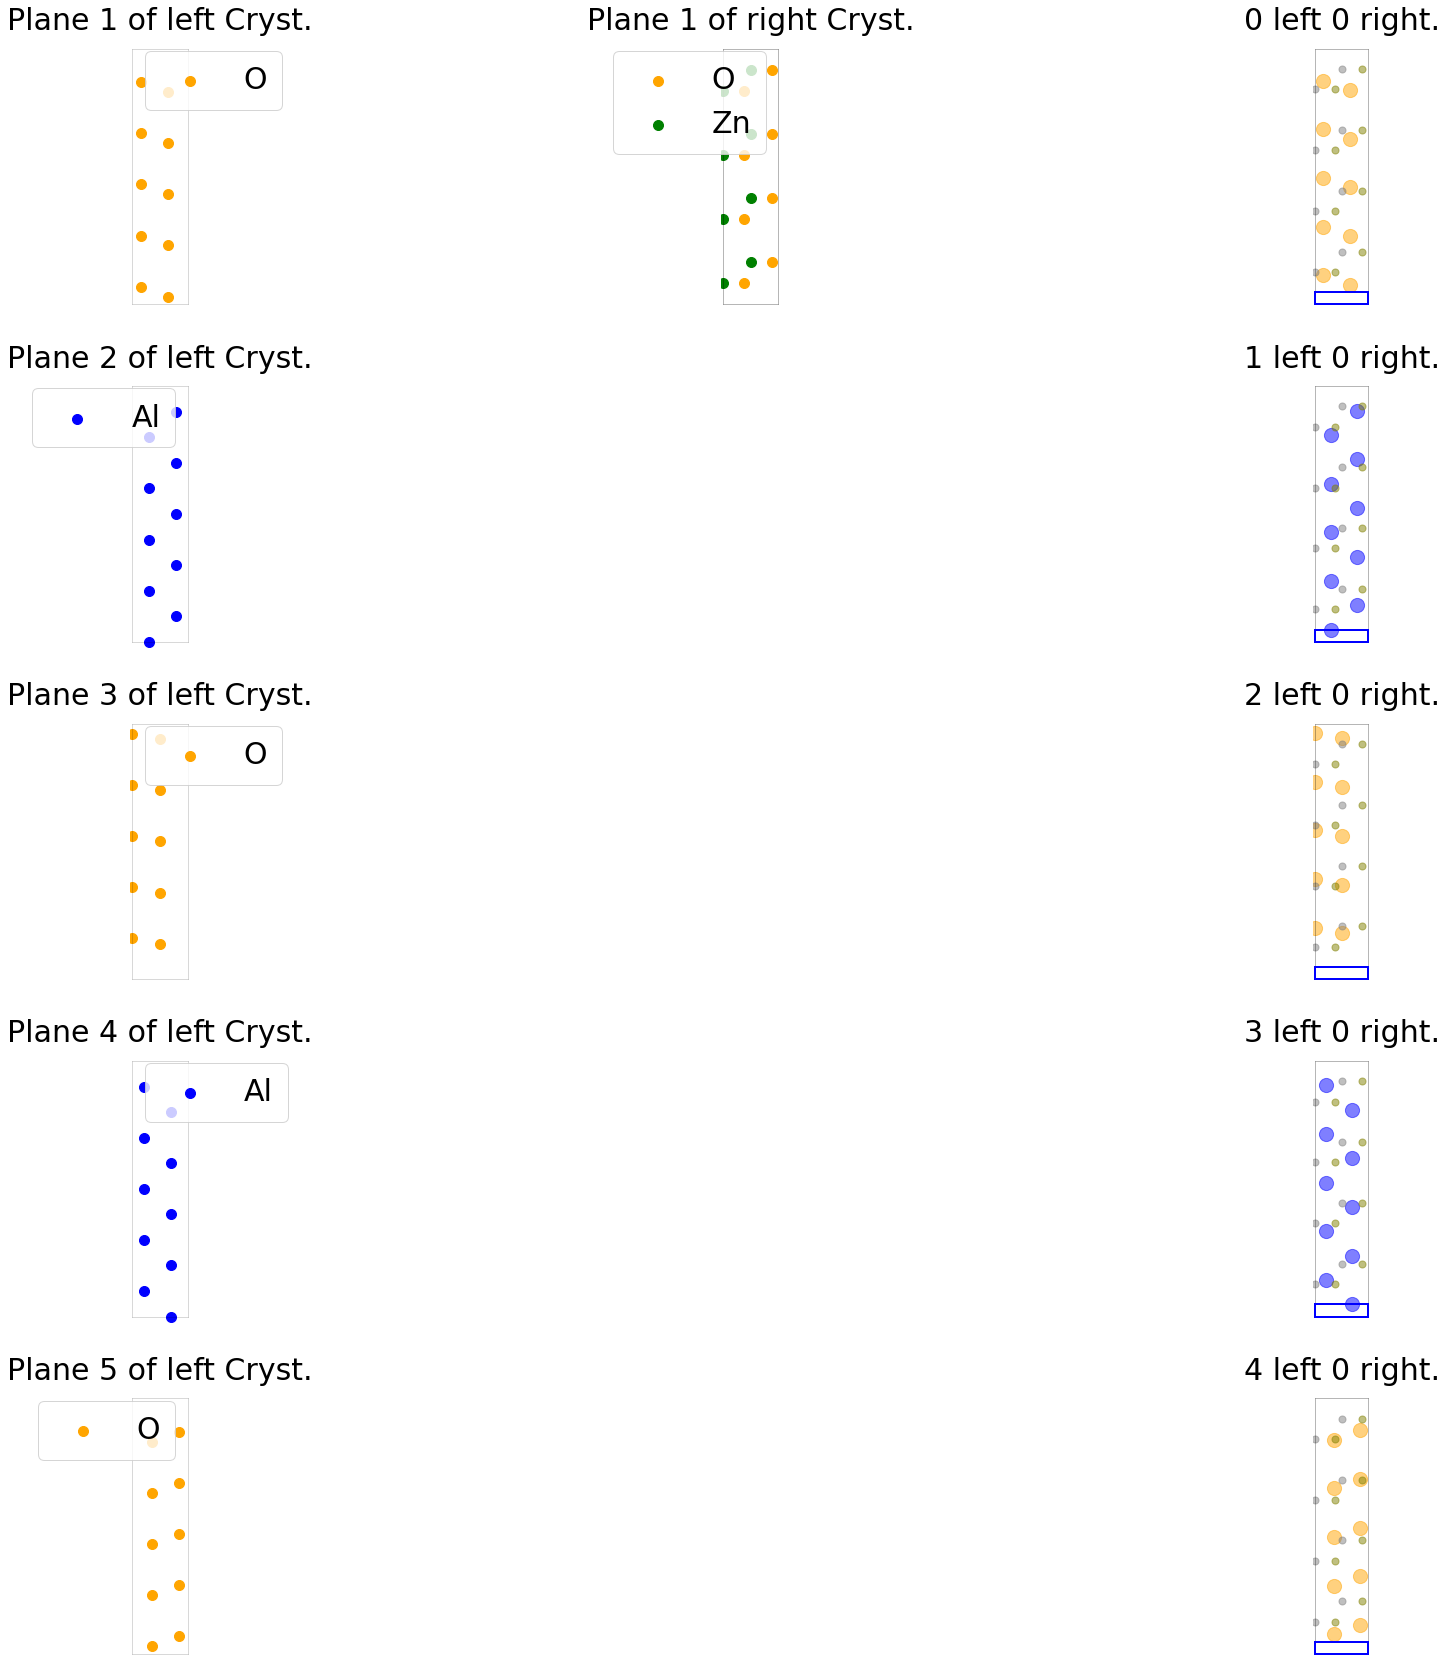

In [11]:
my_interface.draw_terminations(figuresize = (30,30), \
                               figuredpi = 100, legendsize = 30, titlesize = 30)

In [12]:
#selecing the second terminating plane of lattice 1, simply by setting dp1
my_interface.get_bicrystal(two_D= True, xyz_1 = [2,1,1], xyz_2 = [4,1,1], \
                           dp1 = my_interface.dp_list_1[0] + 0.1)

Please check the new POSCAR file again and you can find that the termination of lattice 1 has shifted to the second plane in the list.